<h3>Problem: Comparing top five companies of India in Bank-Private sector</h4>

Importing all the modules

In [5]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


Specifying the Date

In [6]:
end = dt.date.today()
start = dt.datetime(end.year-1,end.month,end.day)

Collecting the Data set

In [7]:
com_df1 = pd.DataFrame(data.DataReader('BSE/BOM500180', 'quandl', start=start, end=end )['Close'])    #HDFC_Bank

In [8]:
com_df2 = pd.DataFrame(data.DataReader('BSE/BOM500247', 'quandl', start=start, end=end )['Close'])    #Kotak_Mahindra

In [9]:
com_df3 = pd.DataFrame(data.DataReader('BSE/BOM532174', 'quandl', start=start, end=end )['Close'])    #ICICI_Bank

In [10]:
com_df4 = pd.DataFrame(data.DataReader('BSE/BOM532215', 'quandl', start=start, end=end )['Close'])    #Axis_Bank

In [11]:
com_df5 = pd.DataFrame(data.DataReader('BSE/BOM532187', 'quandl', start=start, end=end )['Close'])    #Indusind_Bank

Renaming the close columns

In [9]:
HDFC_Bank = com_df1.rename(columns={'Close':'HDFC_Bank'})
Kotak_Mahindra = com_df2.rename(columns={'Close':'Kotak_Mahindra'})
ICICI_Bank = com_df3.rename(columns={'Close':'ICICI_Bank'})
AXIS_Bank = com_df4.rename(columns={'Close':'AXIS_Bank'})
Indusind_Bank = com_df5.rename(columns={'Close':'Indusind_Bank'})

Joinig all the data frames

In [10]:
close_df = (((HDFC_Bank.join(Kotak_Mahindra, how="outer")).join(ICICI_Bank, how="outer")).join(AXIS_Bank, how="outer")).join(Indusind_Bank,how="outer")

In [11]:
close_df

,HDFC_Bank,Kotak_Mahindra,ICICI_Bank,AXIS_Bank,Indusind_Bank
Date,,,,,
2018-07-20,2190.10,1333.45,266.00,534.45,1902.30
2018-07-19,2185.70,1350.25,261.20,527.30,1889.05
2018-07-18,2176.05,1402.05,262.60,524.20,1892.35
2018-07-17,2176.70,1402.70,266.30,538.05,1905.15
2018-07-16,2169.35,1408.35,259.30,523.10,1923.30
2018-07-13,2180.70,1404.85,268.05,523.90,1923.45
2018-07-12,2165.20,1393.60,272.40,537.25,1935.40
2018-07-11,2146.55,1382.20,268.85,536.60,1914.85
2018-07-10,2147.10,1372.45,273.40,532.55,1934.10


In [12]:
import seaborn as sns
sns.set_style('whitegrid')

In [13]:
rets = close_df.pct_change()                                    #returns -- one day percent change for each of the stocks
rets.head()

,HDFC_Bank,Kotak_Mahindra,ICICI_Bank,AXIS_Bank,Indusind_Bank
Date,,,,,
2018-07-20,NaN,NaN,NaN,NaN,NaN
2018-07-19,-0.002009,0.012599,-0.018045,-0.013378,-0.006965
2018-07-18,-0.004415,0.038363,0.005360,-0.005879,0.001747
2018-07-17,0.000299,0.000464,0.014090,0.026421,0.006764
2018-07-16,-0.003377,0.004028,-0.026286,-0.027786,0.009527


# Pair Plotting

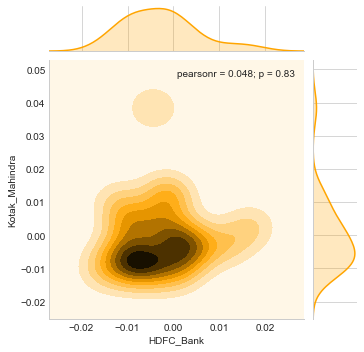

In [38]:
sns.jointplot('HDFC_Bank','Kotak_Mahindra',rets, kind='kde',size=5, color='orange')

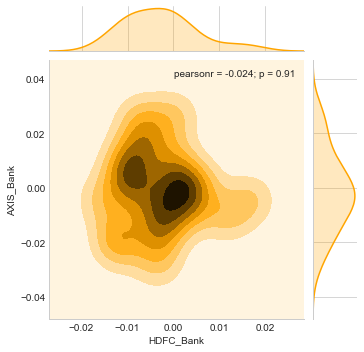

In [37]:
sns.jointplot('HDFC_Bank','AXIS_Bank',rets, kind='kde',size=5, color='orange')

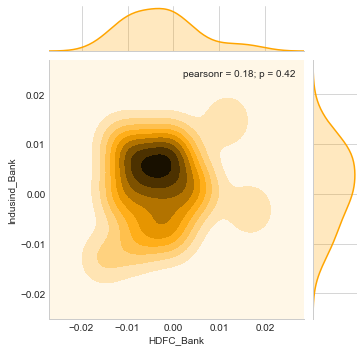

In [36]:
sns.jointplot('HDFC_Bank','Indusind_Bank',rets, kind='kde',size=5, color='orange')

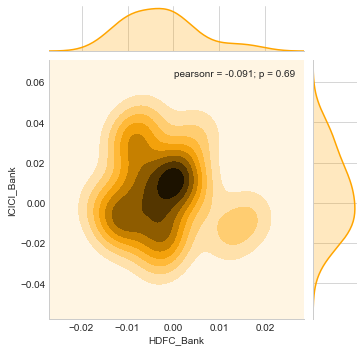

In [43]:
sns.jointplot('HDFC_Bank','ICICI_Bank',rets, kind='kde',size=5, color='orange')

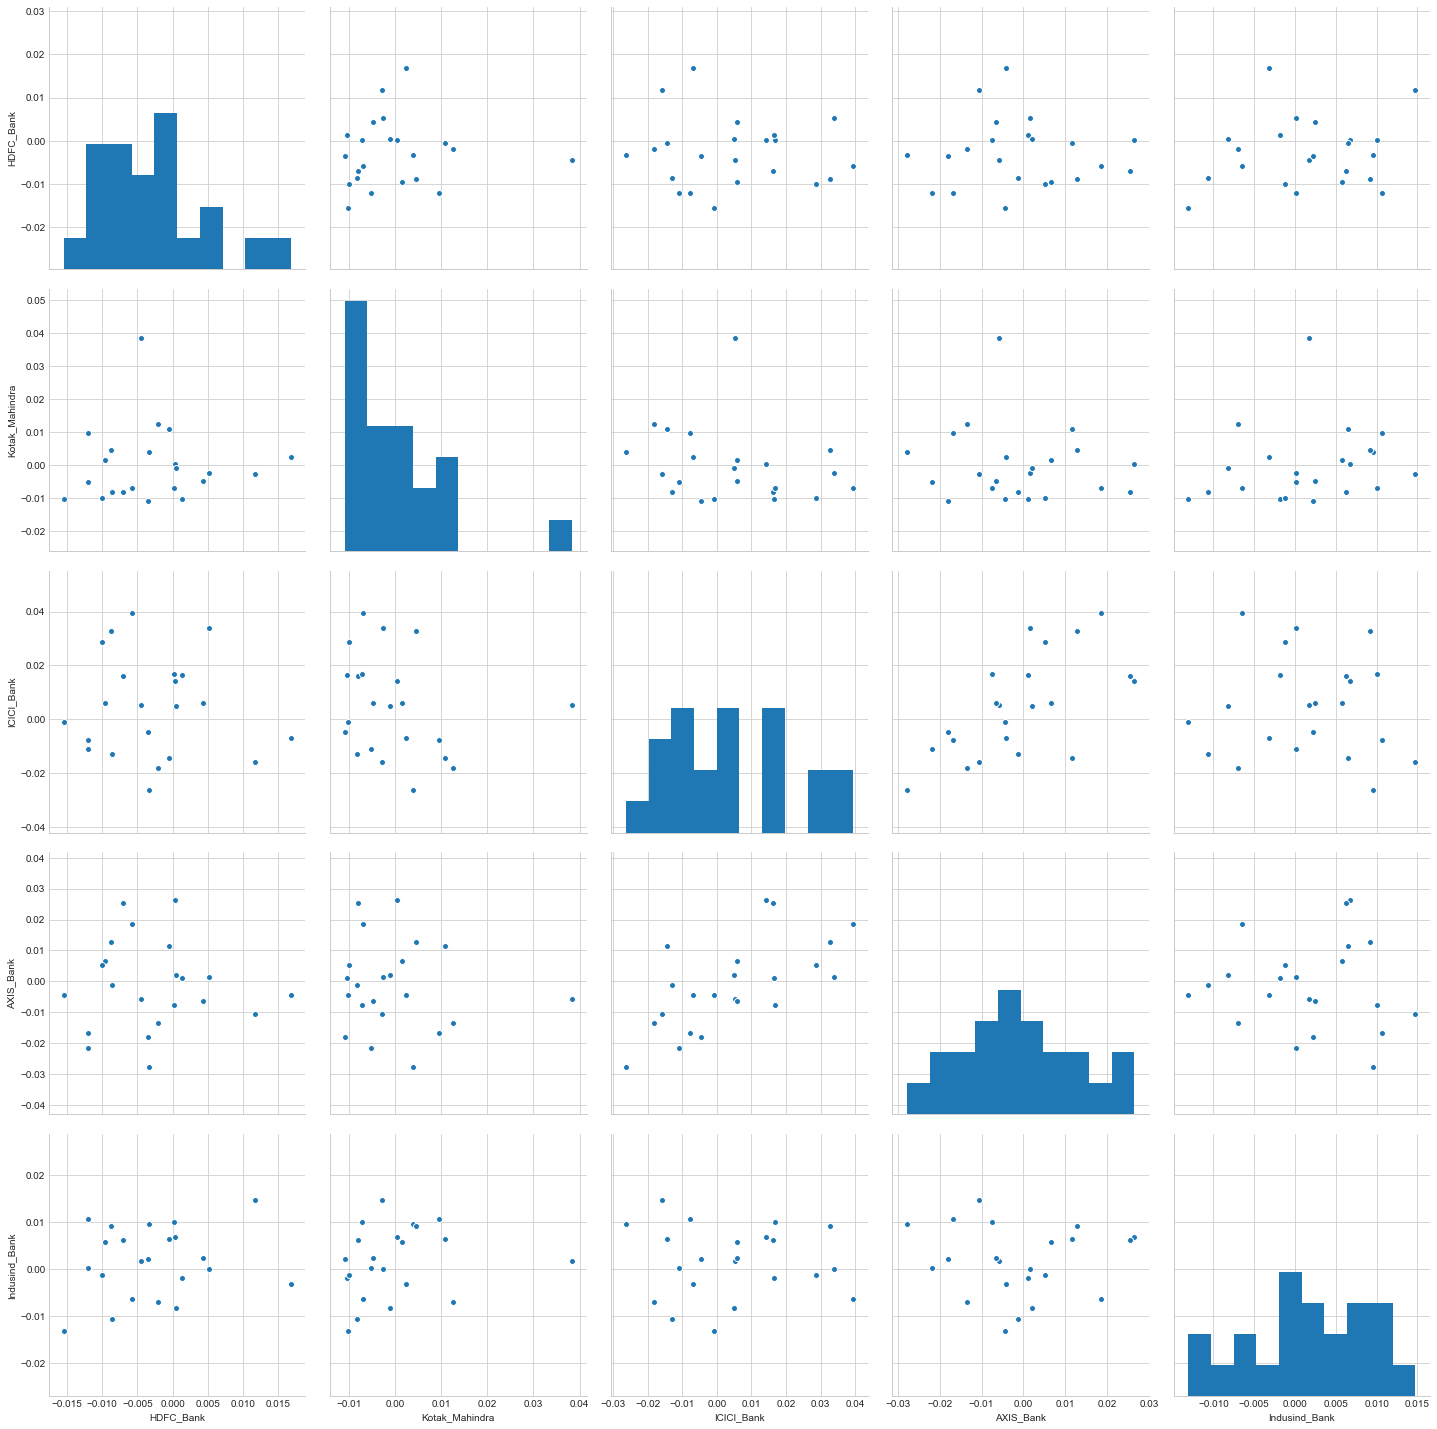

In [49]:
sns.pairplot(rets.dropna(),size=4)

# Correlation Matrix

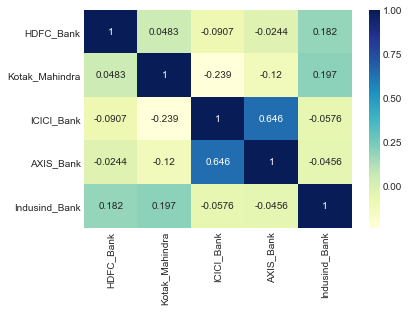

In [50]:
sns.heatmap(rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

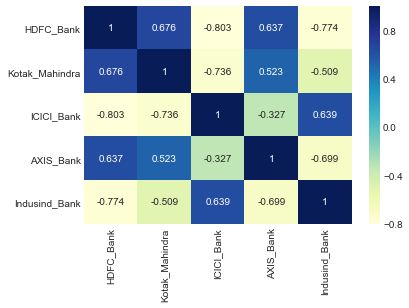

In [51]:
sns.heatmap(close_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<H2> Risk Return Analysis

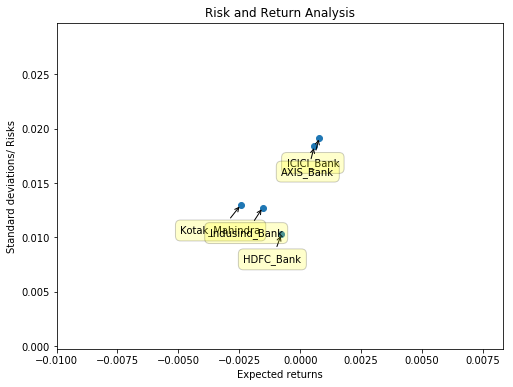

In [37]:
fig, ax = pt.subplots(figsize=(8,6))
pt.scatter(rets.mean(), rets.std())
pt.xlabel('Expected returns')
pt.ylabel('Standard deviations/ Risks')
pt.title('Risk and Return Analysis')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

pt.savefig("5 Risk and Return Analysis.png")


<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [38]:
import numpy as np
import statsmodels.api as sm
X=close_df[['Kotak_Mahindra','ICICI_Bank','AXIS_Bank','Indusind_Bank']]
X = sm.add_constant(X)
y=close_df['HDFC_Bank']
model = sm.OLS(y,X,missing='drop')             #drop rows with missing values
result = model.fit()                           #adjusts the data to model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HDFC_Bank   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     238.6
Date:                Sun, 17 Jun 2018   Prob (F-statistic):           2.41e-52
Time:                        22:58:41   Log-Likelihood:                -504.41
No. Observations:                 112   AIC:                             1019.
Df Residuals:                     107   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            515.1391     86.157      5.979      0.000     344.342     685.936
Kotak_Mahindra     0.4848      0.049      9.889      0.000       0.388       0.582
ICICI_Bank         0.3656      0.284      1.286      0.201      -0.198       0.929
AXIS_Bank          0.7032      0.199      3.538      0.001       0.309       1.097
Indusind_Bank      0.2107      0.062      3.395      0.001       0.088       0.334
==============================================================================
Omnibus:                       15.531   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.740
Skew:                           0.834   Prob(JB):                     0.000141
Kurtosis:                       4.009   Cond. No.                     9.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Plotting the Predicted values and actual values to the model

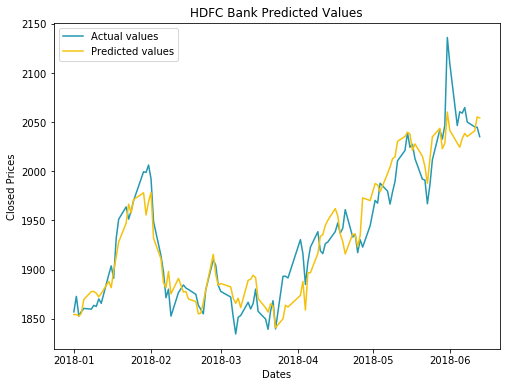

In [39]:
fig, ax = pt.subplots(figsize=(8,6))
ax.plot(y, color="#2498B0", label="Actual values")
ax.plot(result.fittedvalues, color='#f4c20d', label="Predicted values")
ax.set_xlabel('Dates')
ax.set_ylabel('Closed Prices')
ax.set_title('HDFC Bank Predicted Values')
p,q = ax.get_legend_handles_labels()
ax.legend(p, q)
pt.savefig("6 HDFC Bank Predicted Valeus")